# TigerGraph Graph Data Science Library 101 - Centrality Algorithm

This notebook shows the examples of using the most common centrality algorithms in TigerGraph Graph Science Library. More detailed explanations of these algorithms can be four in the official documentation (https://docs.tigergraph.com/graph-ml/current/centrality-algorithms/).  

## Step 1: Setting things up
- Connect and ingest data

In [1]:
from pyTigerGraph.datasets import Datasets

dataset = Datasets("ldbc_snb")

Downloading:   0%|          | 0/286678171 [00:00<?, ?it/s]

In [2]:
from pyTigerGraph import TigerGraphConnection
import json

# Read in DB configs
with open('../config.json', "r") as config_file:
    config = json.load(config_file)

conn = TigerGraphConnection(
    host=config["host"],
    username=config["username"],
    password=config["password"],
)

In [3]:
conn.ingestDataset(dataset, getToken=config["getToken"])

---- Checking database ----
---- Creating graph ----
The graph ldbc_snb is created.
---- Creating schema ----
Using graph 'ldbc_snb'
Successfully created schema change jobs: [ldbc_snb_schema].
Kick off schema change job ldbc_snb_schema
Doing schema change on graph 'ldbc_snb' (current version: 0)
Trying to add local vertex 'Comment' to the graph 'ldbc_snb'.
Trying to add local vertex 'Post' to the graph 'ldbc_snb'.
Trying to add local vertex 'Company' to the graph 'ldbc_snb'.
Trying to add local vertex 'University' to the graph 'ldbc_snb'.
Trying to add local vertex 'City' to the graph 'ldbc_snb'.
Trying to add local vertex 'Country' to the graph 'ldbc_snb'.
Trying to add local vertex 'Continent' to the graph 'ldbc_snb'.
Trying to add local vertex 'Forum' to the graph 'ldbc_snb'.
Trying to add local vertex 'Person' to the graph 'ldbc_snb'.
Trying to add local vertex 'Tag' to the graph 'ldbc_snb'.
Trying to add local vertex 'Tag_Class' to the graph 'ldbc_snb'.
Trying to add local edge 'C

- Visualize the graph schema 

In [4]:
from pyTigerGraph.visualization import drawSchema

drawSchema(conn.getSchema(force=True))

CytoscapeWidget(cytoscape_layout={'name': 'circle', 'animate': True, 'padding': 1}, cytoscape_style=[{'selecto…

- Get basic stats, e.g., counts of nodes & edges

In [5]:
vertices = conn.getVertexTypes()
for vertex in vertices:
    print("Node count: ({} : {}) ".format(vertex, conn.getVertexCount(vertex)))

Node count: (Comment : 2052169) 
Node count: (Post : 1003605) 
Node count: (Company : 1575) 
Node count: (University : 6380) 
Node count: (City : 1343) 
Node count: (Country : 111) 
Node count: (Continent : 6) 
Node count: (Forum : 90492) 
Node count: (Person : 9892) 
Node count: (Tag : 16080) 
Node count: (Tag_Class : 71) 


In [6]:
import pprint
print("Edges count: ")
pprint.pprint(conn.getEdgeCount())

Edges count: 
{'Container_Of': 1003605,
 'Container_Of_Reverse': 1003605,
 'Has_Creator': 3055774,
 'Has_Creator_Reverse': 3055774,
 'Has_Interest': 229166,
 'Has_Interest_Reverse': 229166,
 'Has_Member': 1611869,
 'Has_Member_Reverse': 1611869,
 'Has_Moderator': 90492,
 'Has_Moderator_Reverse': 90492,
 'Has_Tag': 3721417,
 'Has_Tag_Reverse': 3721417,
 'Has_Type': 0,
 'Has_Type_Reverse': 10663,
 'Is_Located_In': 3073621,
 'Is_Located_In_Reverse': 3073621,
 'Is_Part_Of': 0,
 'Is_Part_Of_Reverse': 111,
 'Is_Subclass_Of': 60,
 'Is_Subclass_Of_Reverse': 66,
 'Knows': 180623,
 'Likes': 1672584,
 'Likes_Reverse': 1692138,
 'Reply_Of': 2052169,
 'Reply_Of_Reverse': 2052169,
 'Study_At': 1992,
 'Study_At_Reverse': 0,
 'Work_At': 5584,
 'Work_At_Reverse': 0}


## Step 2: Leveraging pyTigerGraph’s featurizer to run Centrality algorithms

pyTIgerGraph provides a full suit of data science capabilities, and in this tutorial, we will showcase how to use featurizer to list out all available Centrality algorithms in our GDS library, and to run a few popular algorithms as an example.

In [7]:
feat = conn.gds.featurizer()

In [8]:
feat.listAlgorithms("Centrality")

Available algorithms for Centrality:
  pagerank:
    weighted:
      01. name: tg_pagerank_wt
    unweighted:
      02. name: tg_pagerank
  article_rank:
    03. name: tg_article_rank
  betweenness:
    04. name: tg_betweenness_cent
  closeness:
    approximate:
      05. name: tg_closeness_cent_approx
    exact:
      06. name: tg_closeness_cent
  degree:
    unweighted:
      07. name: tg_degree_cent
    weighted:
      08. name: tg_weighted_degree_cent
  eigenvector:
    09. name: tg_eigenvector_cent
  harmonic:
    10. name: tg_harmonic_cent
Call runAlgorithm() with the algorithm name to execute it


## tg_pagerank
Compute the pageRank score for each vertex in the GRAPH. (https://docs.tigergraph.com/graph-ml/current/centrality-algorithms/pagerank)

In [9]:
params = {
    "v_type": "Person",
    "e_type": "Knows",
    "max_change": 0.001,
    "maximum_iteration": 25,
    "damping": 0.85,
    "top_k": 100,
    "print_results": True,
    "result_attribute": "pagerank",
    "file_path": "",
    "display_edges": False
  }

In [10]:
res = feat.runAlgorithm("tg_pagerank", params=params)

Altering graph schema to save results...
The job add_VERTEX_attr_mMtwZY completes in 2.389 seconds!
Installing and optimizing the queries, it might take a minute...
Queries installed successfully


In [11]:
df = conn.getVertexDataFrame("Person", limit=100_000)
display(df)

,v_id,id,first_name,last_name,gender,birthday,creation_date,location_ip,browser_used,speaks,email,pagerank
0,15393162796526,15393162796526,Shweta,Khan,male,1984-06-30 00:00:00,2011-03-16 17:51:16,103.1.128.123,Firefox,"[or, kn, en]","[Shweta15393162796526@gmail.com, Shweta1539316...",0.59949
1,6597069768560,6597069768560,Jean-Pierre,Kitoko,female,1988-10-28 00:00:00,2010-07-11 12:00:01,197.255.179.64,Firefox,"[fr, ln, en]","[Jean-Pierre6597069768560@gmx.com, Jean-Pierre...",0.30920
2,2199023264346,2199023264346,Carlos,Gutierrez,male,1985-04-19 00:00:00,2010-03-10 12:52:07,201.220.206.82,Firefox,"[es, en]","[Carlos2199023264346@gmail.com, Carlos21990232...",0.55265
3,28587302330830,28587302330830,Aleksandr,Dobrunov,male,1990-01-01 00:00:00,2012-04-14 07:46:31,31.8.197.84,Firefox,"[ru, en]","[Aleksandr28587302330830@gmail.com, Aleksandr2...",2.16470
4,21990232566217,21990232566217,Frank,Burns,male,1986-07-19 00:00:00,2011-10-31 06:33:04,14.1.16.88,Opera,"[vi, en]",[Frank21990232566217@hotmail.com],0.19521
...,...,...,...,...,...,...,...,...,...,...,...,...
9887,26388279071595,26388279071595,Louis,Haddou,male,1989-04-15 00:00:00,2012-02-18 15:01:41,46.226.110.24,Firefox,"[fr, eu, en]","[Louis26388279071595@gmail.com, Louis263882790...",0.76927
9888,26388279076484,26388279076484,David,Smith,male,1984-05-16 00:00:00,2012-03-02 14:58:11,24.53.80.154,Firefox,"[fr, en]","[David26388279076484@gmail.com, David263882790...",0.41903
9889,4460,4460,Jun,Zhu,female,1983-03-31 00:00:00,2010-01-25 22:17:33,14.102.159.52,Firefox,"[zh, en]",[Jun4460@yahoo.com],0.21400
9890,13194139537815,13194139537815,A. K.,Reddy,female,1984-01-29 00:00:00,2011-03-05 13:24:25,49.12.84.12,Firefox,"[bn, hi, en]",[A.K.13194139537815@hotmail.com],0.37957


<AxesSubplot:ylabel='Frequency'>

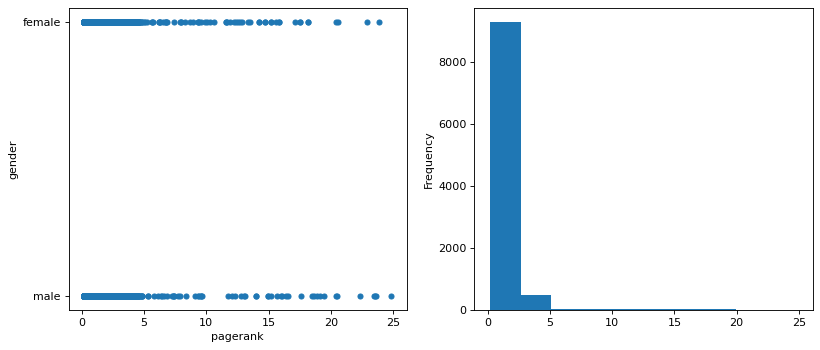

In [12]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12, 5), dpi=80)
ax = fig.add_subplot(121)
df.plot.scatter(x="pagerank", y="gender", ax=ax)
ax = fig.add_subplot(122)
df["pagerank"].plot.hist(ax=ax)

## tg_pagerank_wt

Compute the weighted pageRank score for each vertex in the GRAPH. The only difference between weighted PageRank and standard PageRank is that edges have weights, and the influence that a vertex receives from an in-neighbor is multiplied by the weight of the in-edge. (https://docs.tigergraph.com/graph-ml/current/centrality-algorithms/weighted-pagerank)



In [13]:
params = {
    "v_type": "Person",
    "e_type": "Knows",
    "weight_attribute": "FLOAT",
    "max_change": 0.001,
    "maximum_iteration": 25,
    "damping": 0.85,
    "top_k": 100,
    "print_results": True,
    "result_attribute": "pagerank_wt",
    "file_path": "",
    "display_edges": False
  }

In [14]:
res = feat.runAlgorithm("tg_pagerank_wt", params=params)

Altering graph schema to save results...
The job add_VERTEX_attr_RXGwRN completes in 25.845 seconds!
Installing and optimizing the queries, it might take a minute...
Queries installed successfully


In [15]:
df = conn.getVertexDataFrame("Person", limit=100_000)
display(df)

,v_id,id,first_name,last_name,gender,birthday,creation_date,location_ip,browser_used,speaks,email,pagerank,pagerank_wt
0,15393162796526,15393162796526,Shweta,Khan,male,1984-06-30 00:00:00,2011-03-16 17:51:16,103.1.128.123,Firefox,"[or, kn, en]","[Shweta15393162796526@gmail.com, Shweta1539316...",0.59949,0.15
1,6597069768560,6597069768560,Jean-Pierre,Kitoko,female,1988-10-28 00:00:00,2010-07-11 12:00:01,197.255.179.64,Firefox,"[fr, ln, en]","[Jean-Pierre6597069768560@gmx.com, Jean-Pierre...",0.30920,0.15
2,2199023264346,2199023264346,Carlos,Gutierrez,male,1985-04-19 00:00:00,2010-03-10 12:52:07,201.220.206.82,Firefox,"[es, en]","[Carlos2199023264346@gmail.com, Carlos21990232...",0.55265,0.15
3,28587302330830,28587302330830,Aleksandr,Dobrunov,male,1990-01-01 00:00:00,2012-04-14 07:46:31,31.8.197.84,Firefox,"[ru, en]","[Aleksandr28587302330830@gmail.com, Aleksandr2...",2.16470,0.15
4,21990232566217,21990232566217,Frank,Burns,male,1986-07-19 00:00:00,2011-10-31 06:33:04,14.1.16.88,Opera,"[vi, en]",[Frank21990232566217@hotmail.com],0.19521,0.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9887,26388279071595,26388279071595,Louis,Haddou,male,1989-04-15 00:00:00,2012-02-18 15:01:41,46.226.110.24,Firefox,"[fr, eu, en]","[Louis26388279071595@gmail.com, Louis263882790...",0.76927,0.15
9888,26388279076484,26388279076484,David,Smith,male,1984-05-16 00:00:00,2012-03-02 14:58:11,24.53.80.154,Firefox,"[fr, en]","[David26388279076484@gmail.com, David263882790...",0.41903,0.15
9889,4460,4460,Jun,Zhu,female,1983-03-31 00:00:00,2010-01-25 22:17:33,14.102.159.52,Firefox,"[zh, en]",[Jun4460@yahoo.com],0.21400,0.15
9890,13194139537815,13194139537815,A. K.,Reddy,female,1984-01-29 00:00:00,2011-03-05 13:24:25,49.12.84.12,Firefox,"[bn, hi, en]",[A.K.13194139537815@hotmail.com],0.37957,0.15


<AxesSubplot:ylabel='Frequency'>

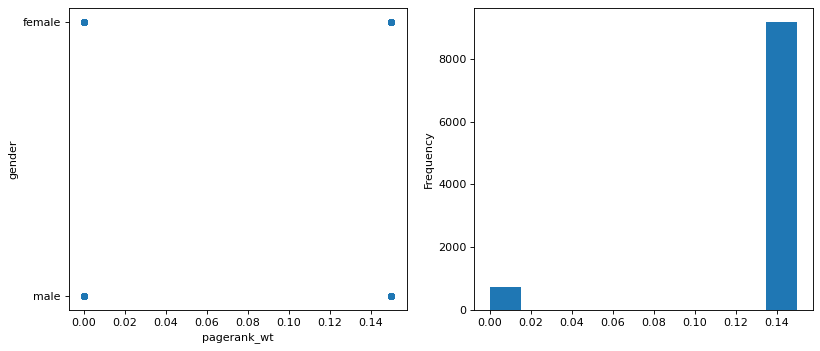

In [16]:
fig = plt.figure(figsize=(12, 5), dpi=80)
ax = fig.add_subplot(121)
df.plot.scatter(x="pagerank_wt", y="gender", ax=ax)
ax = fig.add_subplot(122)
df["pagerank_wt"].plot.hist(ax=ax)

## tg_article_rank

ArticleRank is an algorithm that has been derived from the PageRank algorithm to measure the influence of journal articles. Page Rank assumes that relationships originating from low-degree nodes have a higher influence than relationships from high-degree nodes. Article Rank modifies the formula in such a way that it retains the basic PageRank methodology but lowers the influence of low-degree nodes. (https://docs.tigergraph.com/graph-ml/current/centrality-algorithms/article-rank)

In [17]:
params = {
    "v_type": "Person",
    "e_type": "Knows",
    "max_change": 0.001,
    "maximum_iteration": 25,
    "damping": 0.85,
    "top_k": 100,
    "print_results": True,
    "result_attribute": "article_rank",
    "file_path": ""
  }

In [18]:
res = feat.runAlgorithm("tg_article_rank", params=params)

Altering graph schema to save results...
The job add_VERTEX_attr_wvBWQI completes in 28.126 seconds!
Installing and optimizing the queries, it might take a minute...
Queries installed successfully


In [19]:
df = conn.getVertexDataFrame("Person", limit=100_000)
display(df)

,v_id,id,first_name,last_name,gender,birthday,creation_date,location_ip,browser_used,speaks,email,pagerank,pagerank_wt,article_rank
0,15393162796526,15393162796526,Shweta,Khan,male,1984-06-30 00:00:00,2011-03-16 17:51:16,103.1.128.123,Firefox,"[or, kn, en]","[Shweta15393162796526@gmail.com, Shweta1539316...",0.59949,0.15,1.029270e+31
1,6597069768560,6597069768560,Jean-Pierre,Kitoko,female,1988-10-28 00:00:00,2010-07-11 12:00:01,197.255.179.64,Firefox,"[fr, ln, en]","[Jean-Pierre6597069768560@gmx.com, Jean-Pierre...",0.30920,0.15,3.529777e+30
2,2199023264346,2199023264346,Carlos,Gutierrez,male,1985-04-19 00:00:00,2010-03-10 12:52:07,201.220.206.82,Firefox,"[es, en]","[Carlos2199023264346@gmail.com, Carlos21990232...",0.55265,0.15,9.315491e+30
3,28587302330830,28587302330830,Aleksandr,Dobrunov,male,1990-01-01 00:00:00,2012-04-14 07:46:31,31.8.197.84,Firefox,"[ru, en]","[Aleksandr28587302330830@gmail.com, Aleksandr2...",2.16470,0.15,4.082070e+31
4,21990232566217,21990232566217,Frank,Burns,male,1986-07-19 00:00:00,2011-10-31 06:33:04,14.1.16.88,Opera,"[vi, en]",[Frank21990232566217@hotmail.com],0.19521,0.15,9.277864e+29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9887,26388279071595,26388279071595,Louis,Haddou,male,1989-04-15 00:00:00,2012-02-18 15:01:41,46.226.110.24,Firefox,"[fr, eu, en]","[Louis26388279071595@gmail.com, Louis263882790...",0.76927,0.15,1.436795e+31
9888,26388279076484,26388279076484,David,Smith,male,1984-05-16 00:00:00,2012-03-02 14:58:11,24.53.80.154,Firefox,"[fr, en]","[David26388279076484@gmail.com, David263882790...",0.41903,0.15,6.082426e+30
9889,4460,4460,Jun,Zhu,female,1983-03-31 00:00:00,2010-01-25 22:17:33,14.102.159.52,Firefox,"[zh, en]",[Jun4460@yahoo.com],0.21400,0.15,1.440586e+30
9890,13194139537815,13194139537815,A. K.,Reddy,female,1984-01-29 00:00:00,2011-03-05 13:24:25,49.12.84.12,Firefox,"[bn, hi, en]",[A.K.13194139537815@hotmail.com],0.37957,0.15,5.192020e+30


<AxesSubplot:ylabel='Frequency'>

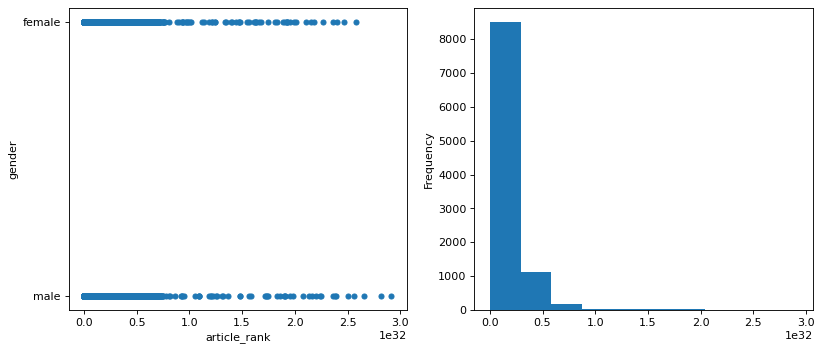

In [20]:
fig = plt.figure(figsize=(12, 5), dpi=80)
ax = fig.add_subplot(121)
df.plot.scatter(x="article_rank", y="gender", ax=ax)
ax = fig.add_subplot(122)
df["article_rank"].plot.hist(ax=ax)


## tg_closeness_cent

Closeness Centrality provides a precise measure of how "centrally located" a vertex is. (https://docs.tigergraph.com/graph-ml/current/centrality-algorithms/closeness-centrality)

In [21]:
params = {
    "v_type_set": ["Tag", "Tag_Class"],
    "e_type_set": "Has_Type",
    "reverse_e_type": "Has_Type_Reverse",
    "max_hops": 5,
    "top_k": 10,
    "wf": True,
    "print_results": True,
    "result_attribute": "closeness_cent",
    "file_path": "",
    "display_edges": False
  }


In [ ]:
res = feat.runAlgorithm("tg_closeness_cent", params=params)

Altering graph schema to save results...


In [ ]:
df = conn.getVertexDataFrame("Tag", limit=100_000)
display(df)

In [ ]:
df["closeness_cent"].value_counts()